## Divorce prediction

### Analiza verovatnoće razvoda braka

Podaci su prikupljeni intervjuisanjem učesnika koji su odgovarali na postavljena pitanja koja se tiču njihovog odnosa sa partnerom.  
Učesnici su odgovarali na pitanja tako što su birali vrednost na skali od 0 (Ne slažem se sa izjavom) do 4 (Slažem se sa izjavom).

In [1]:
import numpy as np 
import os 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from IPython.display import YouTubeVideo

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, average_precision_score, roc_auc_score, roc_curve, confusion_matrix, auc, classification_report, f1_score

from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
divorce_data  = pd.read_csv('divorce.csv', delimiter=';')
attribute_info = pd.read_csv('AttributeInformation.tsv', delimiter='|')

In [3]:
attribute_info = attribute_info.set_index('atribute_id')

Pitanja koja su postavljana učesnicima se nalaze u fajlu 'AttributeInformation.tsv' i ona su ujedno i opisi atributa.
1. If one of us apologizes when our discussion deteriorates, the discussion ends.
2. I know we can ignore our differences, even if things get hard sometimes.
3. When we need it, we can take our discussions with my spouse from the beginning and correct it.
4. When I discuss with my spouse, to contact him will eventually work.
5. The time I spent with my wife is special for us.
6. We don't have time at home as partners.
7. We are like two strangers who share the same environment at home rather than family.
8. I enjoy our holidays with my wife.
9. I enjoy traveling with my wife.
10. Most of our goals are common to my spouse.
11. I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
12. My spouse and I have similar values in terms of personal freedom.
13. My spouse and I have similar sense of entertainment.
14. Most of our goals for people (children, friends, etc.) are the same.
15. Our dreams with my spouse are similar and harmonious.
16. We're compatible with my spouse about what love should be.
17. We share the same views about being happy in our life with my spouse
18. My spouse and I have similar ideas about how marriage should be
19. My spouse and I have similar ideas about how roles should be in marriage
20. My spouse and I have similar values in trust.
21. I know exactly what my wife likes.
22. I know how my spouse wants to be taken care of when she/he sick.
23. I know my spouse's favorite food.
24. I can tell you what kind of stress my spouse is facing in her/his life.
25. I have knowledge of my spouse's inner world.
26. I know my spouse's basic anxieties.
27. I know what my spouse's current sources of stress are.
28. I know my spouse's hopes and wishes.
29. I know my spouse very well.
30. I know my spouse's friends and their social relationships.
31. I feel aggressive when I argue with my spouse.
32. When discussing with my spouse, I usually use expressions such as ‘you always’ or ‘you never’ .
33. I can use negative statements about my spouse's personality during our discussions.
34. I can use offensive expressions during our discussions.
35. I can insult my spouse during our discussions.
36. I can be humiliating when we discussions.
37. My discussion with my spouse is not calm.
38. I hate my spouse's way of open a subject.
39. Our discussions often occur suddenly.
40. We're just starting a discussion before I know what's going on.
41. When I talk to my spouse about something, my calm suddenly breaks.
42. When I argue with my spouse, ı only go out and I don't say a word.
43. I mostly stay silent to calm the environment a little bit.
44. Sometimes I think it's good for me to leave home for a while.
45. I'd rather stay silent than discuss with my spouse.
46. Even if I'm right in the discussion, I stay silent to hurt my spouse.
47. When I discuss with my spouse, I stay silent because I am afraid of not being able to control my anger.
48. I feel right in our discussions.
49. I have nothing to do with what I've been accused of.
50. I'm not actually the one who's guilty about what I'm accused of.
51. I'm not the one who's wrong about problems at home.
52. I wouldn't hesitate to tell my spouse about her/his inadequacy.
53. When I discuss, I remind my spouse of her/his inadequacy.
54. I'm not afraid to tell my spouse about her/his incompetence. 

In [4]:
attribute_info.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54 entries, 1 to 54
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   description  54 non-null     object
dtypes: object(1)
memory usage: 864.0+ bytes


Ovaj dataset nema vrednosti koje nedostaju:

In [5]:
divorce_data.isnull().any().sum()

0

Ovaj dataset ima 170 instanci:

In [6]:
divorce_data.shape

(170, 55)

In [7]:
pd.set_option('display.max_columns', 55)

In [8]:
divorce_data.head(10)

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,2,1,2,0,1,2,1,3,3,2,1,1,2,3,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,4,3,4,0,4,4,4,4,3,2,1,1,0,2,2,1,2,0,1,1,0,4,2,3,0,2,3,4,2,4,2,2,3,4,2,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,3,4,2,3,3,3,3,3,3,2,1,0,1,2,2,2,2,2,3,2,3,3,1,1,1,1,2,1,3,3,3,3,2,3,2,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,4,3,3,4,3,3,3,3,3,4,1,1,1,1,2,1,1,1,1,3,2,3,2,2,1,1,3,3,4,4,2,2,3,2,3,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,0,1,0,1,1,1,1,1,2,1,1,0,0,0,0,2,1,2,1,1,1,1,1,1,0,0,0,0,2,1,0,2,3,0,2,2,1,2,3,2,2,2,1,0,1
5,0,0,1,0,0,2,0,0,0,1,0,2,1,0,2,0,2,1,0,1,0,0,0,0,2,2,0,0,0,0,4,1,1,1,1,1,1,2,0,2,2,1,2,3,0,2,2,1,2,1,1,1,2,0,1
6,3,3,3,2,1,3,4,3,2,2,2,2,2,3,2,3,3,3,3,2,3,3,3,3,2,3,3,2,2,2,1,2,2,1,1,2,3,2,2,3,3,3,3,4,3,3,2,3,2,3,3,2,2,2,1
7,2,1,2,2,2,1,0,3,3,2,4,3,2,3,4,3,2,3,2,1,2,1,1,2,3,3,2,2,2,3,1,1,0,2,2,1,4,4,4,4,4,4,3,2,0,0,1,2,2,2,1,1,1,0,1
8,2,2,1,0,0,4,1,3,3,3,3,3,3,3,3,3,3,3,3,3,2,2,2,3,2,3,2,3,2,3,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,2,0,2,2,2,3,0,0,2,1,0,1,2,1,0,0,0,0,1,1,1,1,1,1,1,1,1,0,1,0,0,1,1,2,2,1,2,3,2,2,2,0,2,2,2,2,4,3,3,1


In [9]:
divorce_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 55 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Atr1    170 non-null    int64
 1   Atr2    170 non-null    int64
 2   Atr3    170 non-null    int64
 3   Atr4    170 non-null    int64
 4   Atr5    170 non-null    int64
 5   Atr6    170 non-null    int64
 6   Atr7    170 non-null    int64
 7   Atr8    170 non-null    int64
 8   Atr9    170 non-null    int64
 9   Atr10   170 non-null    int64
 10  Atr11   170 non-null    int64
 11  Atr12   170 non-null    int64
 12  Atr13   170 non-null    int64
 13  Atr14   170 non-null    int64
 14  Atr15   170 non-null    int64
 15  Atr16   170 non-null    int64
 16  Atr17   170 non-null    int64
 17  Atr18   170 non-null    int64
 18  Atr19   170 non-null    int64
 19  Atr20   170 non-null    int64
 20  Atr21   170 non-null    int64
 21  Atr22   170 non-null    int64
 22  Atr23   170 non-null    int64
 23  Atr24   170 non

In [10]:
for atr in divorce_data:
    print("Attribute {}: max value is {} and min value is {}".format(atr, max(divorce_data[atr]), min(divorce_data[atr])))

Attribute Atr1: max value is 4 and min value is 0
Attribute Atr2: max value is 4 and min value is 0
Attribute Atr3: max value is 4 and min value is 0
Attribute Atr4: max value is 4 and min value is 0
Attribute Atr5: max value is 4 and min value is 0
Attribute Atr6: max value is 4 and min value is 0
Attribute Atr7: max value is 4 and min value is 0
Attribute Atr8: max value is 4 and min value is 0
Attribute Atr9: max value is 4 and min value is 0
Attribute Atr10: max value is 4 and min value is 0
Attribute Atr11: max value is 4 and min value is 0
Attribute Atr12: max value is 4 and min value is 0
Attribute Atr13: max value is 4 and min value is 0
Attribute Atr14: max value is 4 and min value is 0
Attribute Atr15: max value is 4 and min value is 0
Attribute Atr16: max value is 4 and min value is 0
Attribute Atr17: max value is 4 and min value is 0
Attribute Atr18: max value is 4 and min value is 0
Attribute Atr19: max value is 4 and min value is 0
Attribute Atr20: max value is 4 and min 

Svi atributi su celi brojevi koji imaju vrednosti izmadju 0 i 4.  
Varijacija (range) između donje i gornje granice je za svaki atribut ista (4).  
Ne postoje vrednosti koje su van opsega 0-4 (outliers).

S obzirom da se atributi odnose na pitanja koja su postavljana učesnicima, ne postoji 'intuitivni' aribut za analizu centralne tendencije (npr. 'price').  
Ovde su atributimi Atr29 (I know my spouse very well) i Atr37 (My discussion with my spouse is not calm) slučalno odabrani.

In [11]:
divorce_data.describe()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,Atr11,Atr12,Atr13,Atr14,Atr15,Atr16,Atr17,Atr18,Atr19,Atr20,Atr21,Atr22,Atr23,Atr24,Atr25,Atr26,Atr27,Atr28,Atr29,Atr30,Atr31,Atr32,Atr33,Atr34,Atr35,Atr36,Atr37,Atr38,Atr39,Atr40,Atr41,Atr42,Atr43,Atr44,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
count,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000,170.000000
mean,1.776471,1.652941,1.764706,1.482353,1.541176,0.747059,0.494118,1.452941,1.458824,1.576471,1.688235,1.652941,1.835294,1.570588,1.570588,1.476471,1.652941,1.517647,1.641176,1.458824,1.388235,1.247059,1.411765,1.511765,1.629412,1.488235,1.400000,1.305882,1.494118,1.494118,2.123529,2.058824,1.805882,1.900000,1.670588,1.605882,2.088235,1.858824,2.088235,1.870588,1.994118,2.158824,2.705882,1.941176,2.458824,2.552941,2.270588,2.741176,2.382353,2.429412,2.476471,2.517647,2.241176,2.011765,0.494118
std,1.627257,1.468654,1.415444,1.504327,1.632169,0.904046,0.898698,1.546371,1.557976,1.421529,1.647082,1.468654,1.478421,1.502765,1.506697,1.504246,1.614512,1.565998,1.641027,1.554173,1.452149,1.446529,1.612041,1.504385,1.530079,1.500447,1.457078,1.467788,1.592315,1.504420,1.646955,1.623445,1.785202,1.630515,1.842228,1.798412,1.716051,1.734802,1.719496,1.796039,1.721761,1.574034,1.348447,1.684267,1.499925,1.371786,1.586841,1.137348,1.511587,1.405090,1.260238,1.476537,1.505634,1.667611,0.501442
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000
50%,2.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.500000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.500000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,0.500000,0.000000,2.000000,1.000000,2.000000,1.500000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,3.000000,3.000000,2.000000,2.000000,0.000000
75%,3.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,1.000000
max,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000

In [12]:
divorce_data_described = divorce_data.describe()

In [13]:
divorce_data_described['Atr29']

count    170.000000
mean       1.494118
std        1.592315
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max        4.000000
Name: Atr29, dtype: float64

In [14]:
spouses_know_each_other = divorce_data['Atr29']

In [15]:
for i in range(0, 5):
    print('Value {} is appearing {} times'.format(i,spouses_know_each_other.where(spouses_know_each_other == i).count()))

Value 0 is appearing 81 times
Value 1 is appearing 13 times
Value 2 is appearing 10 times
Value 3 is appearing 43 times
Value 4 is appearing 23 times


Srednja vrednost atributa 'I know my spouse very well' je 1.494118, dok je median 1 (50% percentil). Vrednost za atribut koja se pojavljuje najviše puta (81) je 0. Standardna devijacija je 1.592315.

In [16]:
divorce_data_described['Atr37']

count    170.000000
mean       2.088235
std        1.716051
min        0.000000
25%        0.000000
50%        2.000000
75%        4.000000
max        4.000000
Name: Atr37, dtype: float64

In [17]:
spouses_discussion_not_calm = divorce_data['Atr37']

In [18]:
for i in range(0, 5):
    print('Value {} is appearing {} times'.format(i,spouses_discussion_not_calm.where(spouses_discussion_not_calm == i).count()))

Value 0 is appearing 49 times
Value 1 is appearing 31 times
Value 2 is appearing 10 times
Value 3 is appearing 16 times
Value 4 is appearing 64 times


Srednja vrednost atributa 'My discussion with my spouse is not calm' je 2.088235, dok je median 2 (50% percentil). Vrednost za atribut koja se pojavljuje najviše puta (64) je 4. Standardna devijacija je 1.716051.

S obzirom da se vrednosti atributa kreću između 0 i 4, ne može se mnogo toga zaključiti iz ovih statističkih vrednosti. 

Broj razvedenih (klasa 1) i nerazvedenih supružnika (klasa 0):

[Text(0.5, 0, 'Divorce (0 = Not Divorced, 1 = Divorced)'),
 Text(0, 0.5, 'Count')]

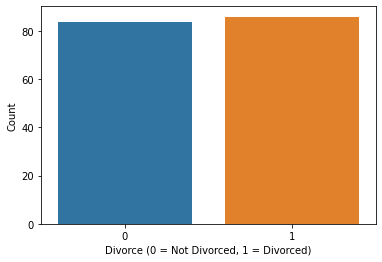

In [19]:
divorce_dist = sns.barplot(x=divorce_data['Class'].unique(), y=divorce_data['Class'].value_counts())
divorce_dist.set(xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)', ylabel = 'Count')

Odnos nekih atributa sa stopom razvoda supružnika:  
*Vrednosti atributa se kreću između 0 (Ne slažem se) i 4 (Slažem se)

[Text(0, 0.5, "I'd rather stay silent than discuss with my spouse"),
 Text(0.5, 0, 'Divorce (0 = Not Divorced, 1 = Divorced)')]

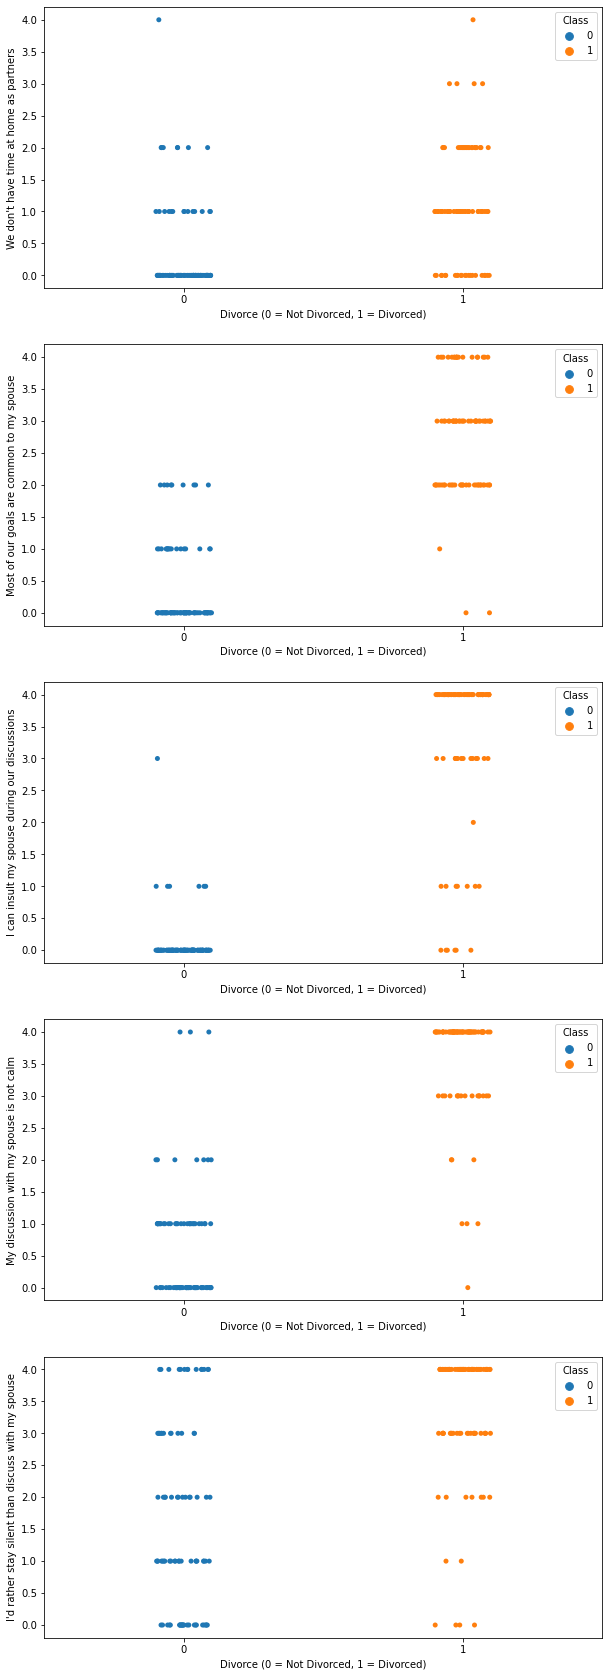

In [20]:
attributes_fig, axis = plt.subplots(5, 1, figsize = (10, 30))

spouse_time_ax = sns.stripplot(x="Class", y = "Atr6", hue ="Class", data=divorce_data, ax = axis[0])
spouse_time_ax.set(ylabel = 'We don\'t have time at home as partners', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouse_goals_ax = sns.stripplot(x="Class", y = "Atr10", hue ="Class", data=divorce_data, ax = axis[1])
spouse_goals_ax.set(ylabel = 'Most of our goals are common to my spouse', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouse_insult_ax = sns.stripplot(x="Class", y = "Atr35", hue ="Class", data=divorce_data, ax = axis[2])
spouse_insult_ax.set(ylabel = 'I can insult my spouse during our discussions', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouse_discussion_not_calm_ax = sns.stripplot(x="Class", y = "Atr37", hue ="Class", data=divorce_data, ax = axis[3])
spouse_discussion_not_calm_ax.set(ylabel = 'My discussion with my spouse is not calm', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouse_silent_ax = sns.stripplot(x="Class", y = "Atr45", hue ="Class", data=divorce_data, ax = axis[4])
spouse_silent_ax.set(ylabel = 'I\'d rather stay silent than discuss with my spouse', xlabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

Ovakvom analizom se može zaključiti da je razvod vrlo verovatan između supružnika koji nemaju mirnu diskusiju i koji mogu vređati jedno drugog. ('I can insult my spouse during our discussions' i 'My discussion with my spouse is not calm')  
Supružnici koji izbegavaju razgovor ili ne provode dovoljno vremena zajedno imaju jednake šanse da ostanu u braku ili da se razvedu. (ćI'd rather stay silent than discuss with my spouse' i 'We don't have time at home as partners')  
Zanimljiv je odnos između zajedničkih ciljeva supružnika i verovatnoće razvoda. Oni koji imaju zajedničke ciljeve imaju veće šanse za razvod. ('Most of our goals are common to my spouse')  

Distribucija nekih atributa i odnos istih sa stopom razvoda supružnika:

[Text(0.5, 0, 'We are like two strangers who share the same environment'),
 Text(0, 0.5, 'Divorce (0 = Not Divorced, 1 = Divorced)')]

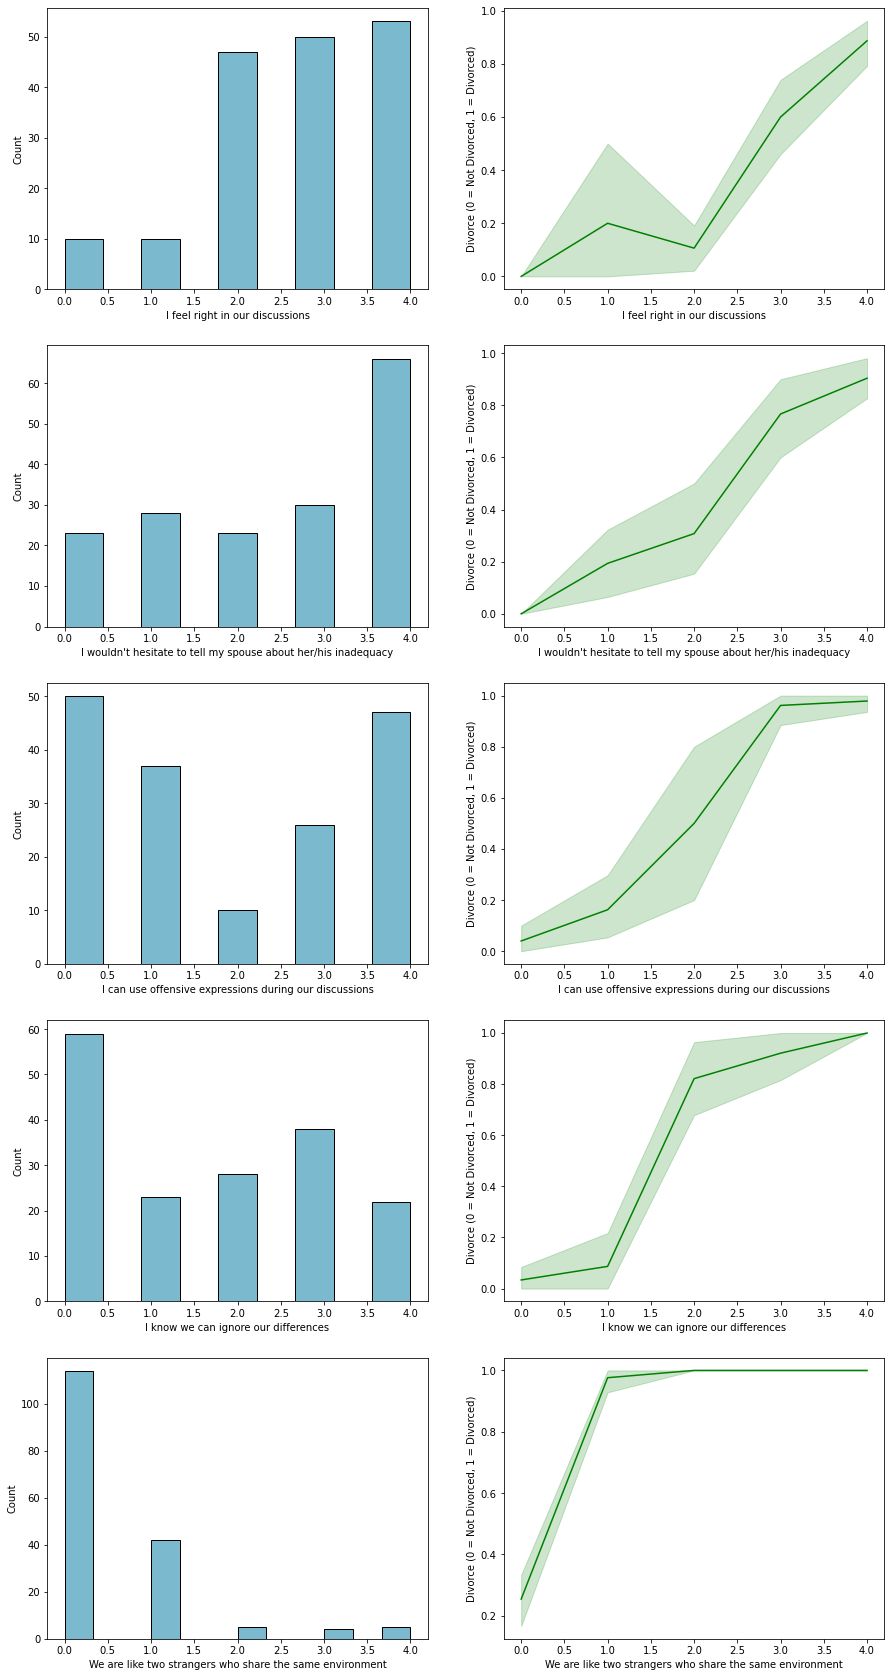

In [21]:
attributes_count_fig, count_axis = plt.subplots(5, 2, figsize = (15, 30))

spouses_right_in_discussions = sns.histplot(divorce_data['Atr48'], color = '#4FA2BF', ax = count_axis[0, 0]);
spouses_right_in_discussions.set(xlabel = 'I feel right in our discussions')

spouses_right_in_discussions_line = sns.lineplot(x="Atr48", y="Class", data=divorce_data, color = 'green', ax = count_axis[0, 1])
spouses_right_in_discussions_line.set(xlabel = 'I feel right in our discussions', ylabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouses_inadequacy = sns.histplot(divorce_data['Atr52'], color = '#4FA2BF', ax = count_axis[1, 0]);
spouses_inadequacy.set(xlabel = 'I wouldn\'t hesitate to tell my spouse about her/his inadequacy')

spouses_inadequacy_line = sns.lineplot(x="Atr53", y="Class", data=divorce_data, color = 'green', ax = count_axis[1, 1])
spouses_inadequacy_line.set(xlabel = 'I wouldn\'t hesitate to tell my spouse about her/his inadequacy', ylabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouses_offensive = sns.histplot(divorce_data['Atr34'], color = '#4FA2BF', ax = count_axis[2, 0]);
spouses_offensive.set(xlabel = 'I can use offensive expressions during our discussions')

spouses_offensive_line = sns.lineplot(x="Atr34", y="Class", data=divorce_data, color = 'green', ax = count_axis[2, 1])
spouses_offensive_line.set(xlabel = 'I can use offensive expressions during our discussions', ylabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouses_differences = sns.histplot(divorce_data['Atr2'], color = '#4FA2BF', ax = count_axis[3, 0]);
spouses_differences.set(xlabel = 'I know we can ignore our differences')

spouses_differences_line = sns.lineplot(x="Atr2", y="Class", data=divorce_data, color = 'green', ax = count_axis[3, 1])
spouses_differences_line.set(xlabel = 'I know we can ignore our differences', ylabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

spouses_strangers = sns.histplot(divorce_data['Atr7'], color = '#4FA2BF', ax = count_axis[4, 0]);
spouses_strangers.set(xlabel = 'We are like two strangers who share the same environment')

spouses_strangers_line = sns.lineplot(x="Atr7", y="Class", data=divorce_data, color = 'green', ax = count_axis[4, 1])
spouses_strangers_line.set(xlabel = 'We are like two strangers who share the same environment', ylabel = 'Divorce (0 = Not Divorced, 1 = Divorced)')

Ovde se može videti koliko se ispitanika slaže sa određenom izjavom. Takođe se vidi kakav je odnos atributa (izjava) sa stopom razvoda. Na primer, vidi se da se oko 50 ispitanika ne slaže sa izjavom da mogu vređati partnera tokom diskusije, a nešto manje od 50 se u potpunosti slaže sa istom. Vidi se i da je stopa razvoda velika kod supružnika koji sa slažu sa ovom izjavom. ('I can use offensive expressions during our discussions').

Odnos između atributa:

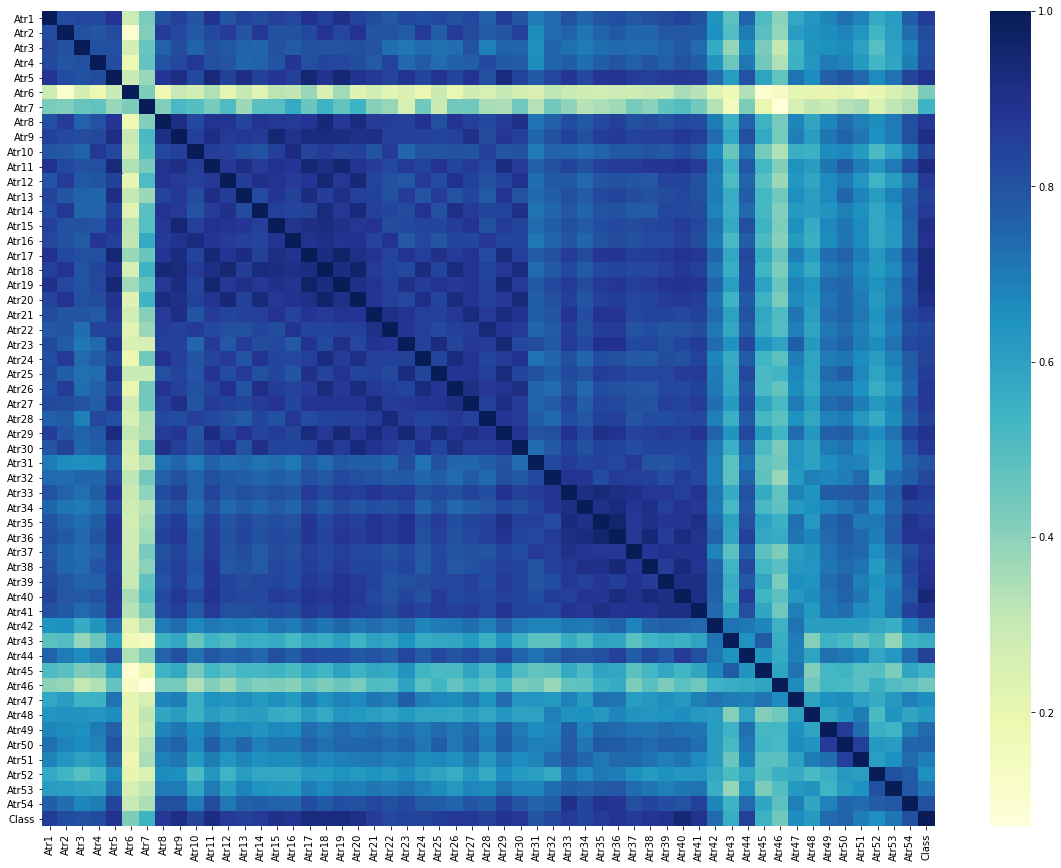

In [22]:
plt.figure(figsize=(20,15))
sns.heatmap(divorce_data.corr(), cmap="YlGnBu")
plt.show()

### Klasifikacija

In [54]:
train_x, test_x = train_test_split(divorce_data, test_size=0.3, random_state = 42)
train_y = train_x.pop('Class')
test_y = test_x.pop('Class')

In [49]:
train_x.shape

(119, 54)

In [50]:
test_x.shape

(51, 54)

In [26]:
#ROC curve
def ROC(test_y, prob_y):
    
    false_positive_rate, true_positive_rate, threshold = roc_curve(test_y, prob_y)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    
    plt.figure(figsize = (10,10))
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, color = 'red', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1], linestyle = '--')
    plt.axis('tight')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')

In [27]:
#Function to apply the models
def model(algorithm, train_x, test_x, train_y, test_y):
    alg = algorithm
    alg_model = alg.fit(train_x, train_y)
    global prob_y, pred_y
    prob_y = alg.predict_proba(test_x)[:,1]
    pred_y = alg_model.predict(test_x)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {} \n\nClassification Report:\n {}'
      .format(accuracy_score(test_y, pred_y), confusion_matrix(test_y, pred_y), classification_report(test_y, pred_y)))
    ROC(test_y, prob_y)

In [28]:
#Function to apply the models without ROC curve
def model_noROC(algorithm, train_x, test_x, train_y, test_y):
    alg = algorithm
    alg_model = alg.fit(train_x, train_y)
    global pred_y
    pred_y = alg_model.predict(test_x)

    print('Accuracy Score: {}\n\nConfusion Matrix:\n {} \n\nClassification Report:\n {}'
      .format(accuracy_score(test_y, pred_y), confusion_matrix(test_y, pred_y), classification_report(test_y, pred_y)))

#### Random Forest

Accuracy Score: 0.9803921568627451

Confusion Matrix:
 [[25  0]
 [ 1 25]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



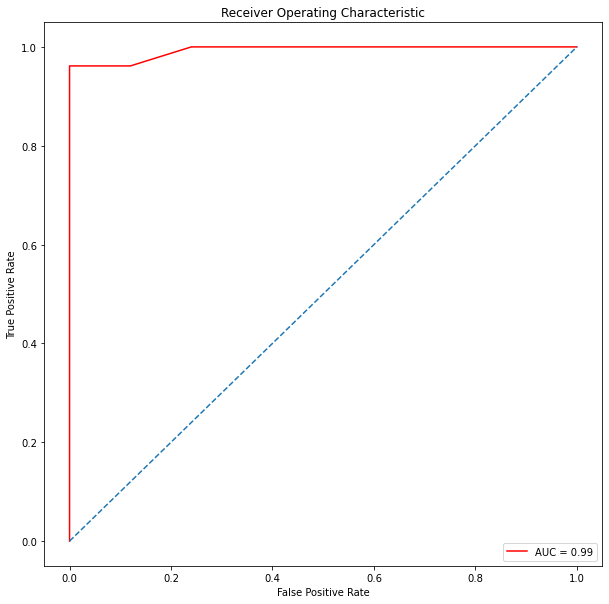

In [55]:
model(RandomForestClassifier(), train_x, test_x, train_y, test_y)

Tačnost Random Forest kasifikacije je 0.98.  
Iz confusion matrice se vidi da postoji 1 false negative vrednost.  
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.  
ROC kriva pokazuje dobre performanse modela.

#### Logistic Regression

Accuracy Score: 1.0

Confusion Matrix:
 [[25  0]
 [ 0 26]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



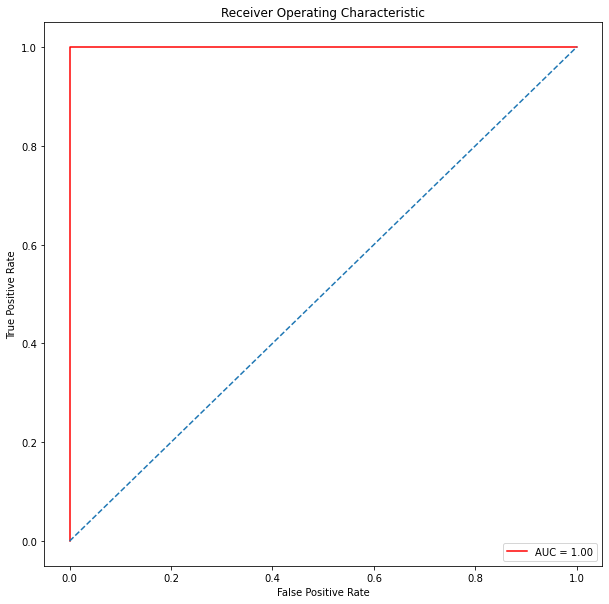

In [58]:
model(LogisticRegression(), train_x, test_x, train_y, test_y)

Tačnost Logistic Regression kasifikacije je 1.  
Iz confusion matrice se vidi da su sve vrednosti dobro predvđjene.  
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.  
ROC kriva pokazuje dobre performanse modela.

#### K-Nearest Neighbors

Accuracy Score: 0.9803921568627451

Confusion Matrix:
 [[25  0]
 [ 1 25]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



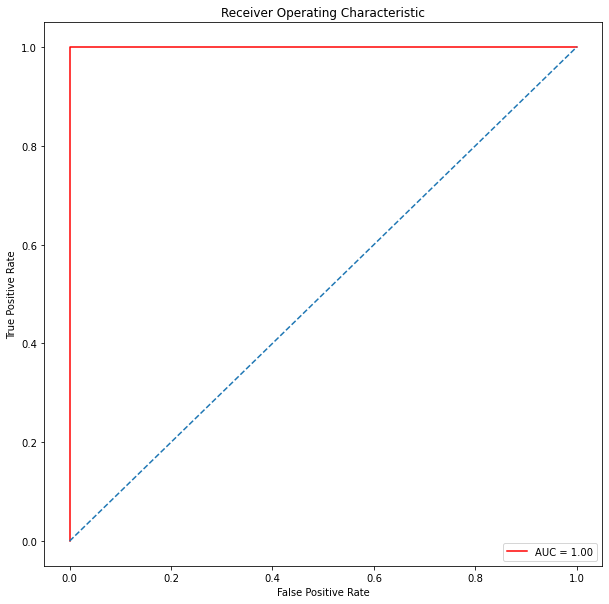

In [59]:
model(KNeighborsClassifier(), train_x, test_x, train_y, test_y)

Tačnost K-Nearest Neighbors kasifikacije je 0.98.  
Iz confusion matrice se vidi da postoji 1 false negative vrednost.  
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.  
ROC kriva pokazuje dobre performanse modela.

#### Gaussian Naive Bayes

Accuracy Score: 0.9803921568627451

Confusion Matrix:
 [[24  1]
 [ 0 26]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98        25
           1       0.96      1.00      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



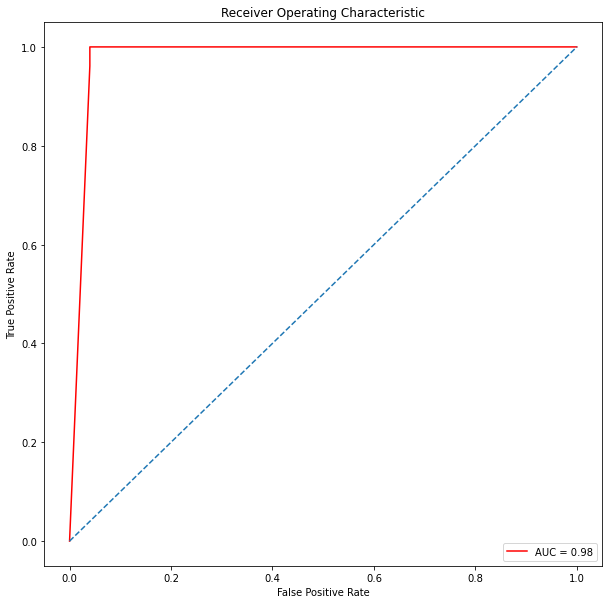

In [60]:
model(GaussianNB(), train_x, test_x, train_y, test_y)

Tačnost Naive Bayes kasifikacije je 0.98.  
Iz confusion matrice se vidi da postoje 1 false positive vrednost.  
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.  
ROC kriva pokazuje dobre performanse modela.

#### Decision Tree

Accuracy Score: 0.9019607843137255

Confusion Matrix:
 [[21  4]
 [ 1 25]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.84      0.89        25
           1       0.86      0.96      0.91        26

    accuracy                           0.90        51
   macro avg       0.91      0.90      0.90        51
weighted avg       0.91      0.90      0.90        51



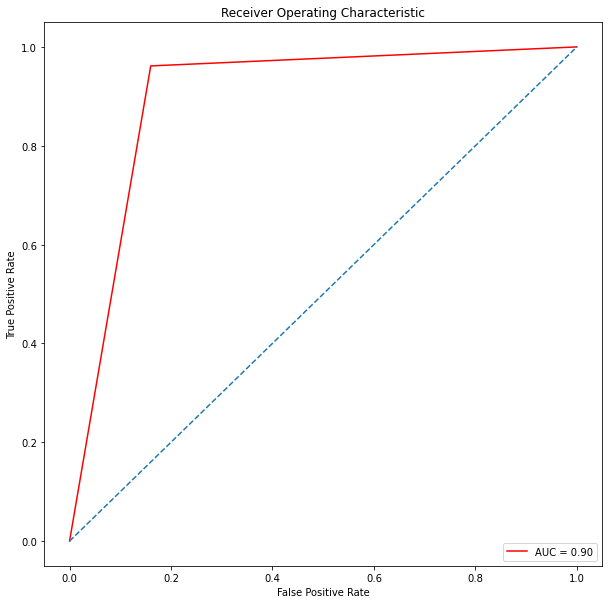

In [61]:
model(DecisionTreeClassifier(max_depth = 12), train_x, test_x, train_y, test_y)

Tačnost Decision Tree kasifikacije je 0.9.  
Iz confusion matrice se vidi da postoje 1 false negative vrednost i 4 false positive vrednosti.  
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.  
ROC kriva pokazuje nesto lošije performanse modela od prethodnih.

#### Neural Network

Accuracy Score: 0.9803921568627451

Confusion Matrix:
 [[25  0]
 [ 1 25]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



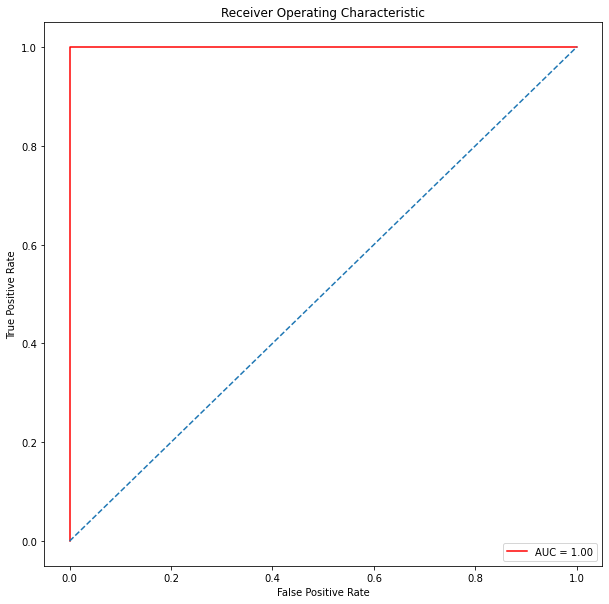

In [62]:
model(MLPClassifier(), train_x, test_x, train_y, test_y)

Tačnost Neural Network kasifikacije je 0.98.  
Iz confusion matrice se vidi da postoji 1 false negative vrednost.  
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.  
ROC kriva pokazuje dobre performanse modela.

#### Support Vector Classification

In [63]:
model_noROC(SVC(kernel = 'linear'), train_x, test_x, train_y, test_y)

Accuracy Score: 1.0

Confusion Matrix:
 [[25  0]
 [ 0 26]] 

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       1.00      1.00      1.00        26

    accuracy                           1.00        51
   macro avg       1.00      1.00      1.00        51
weighted avg       1.00      1.00      1.00        51



Tačnost SVC kasifikacije je 1.  
Iz confusion matrice se vidi da su sve vrednosti dobro predvđjene.   
Iz classification Report-a se vide vrednosti za precision, recall i f1-score za klase 0 i 1.

Evaluacija Random Forest modela nakon 100 rundi:

In [36]:
def evaluate_model(preds, test_y, threshold = 0.5):
    
    preds_int = preds >= threshold
    
    accuracy = accuracy_score(test_y, preds_int)
    roc_auc  = roc_auc_score(test_y, preds)
    pr_auc   = average_precision_score(test_y, preds)
    f1_val   = f1_score(test_y, preds_int)
 
    results = [accuracy, roc_auc, pr_auc, f1_val]
    return(results)

In [43]:
def run_model_evaluation(dataframe, algorithm, n = 100):
    results = pd.DataFrame()
    
    for i in range(n):
        model_train_x, model_test_x = train_test_split(dataframe,
                                   test_size = 0.3,
                                   random_state = None
                                  )
        
        
        model_train_y = model_train_x.pop('Class')
        model_test_y  = model_test_x.pop('Class')
        
        model = algorithm
        model.fit(model_train_x, model_train_y)
        
        preds = model.predict_proba(model_test_x)[:,1]
        
        current_results = evaluate_model(preds, model_test_y)
        results = results.append([current_results])
    
    
    results.reset_index(drop=True, inplace=True)
    results.columns = ['accuracy','roc_auc','pr_auc','f1_score']
    return(results, model)

In [44]:
rf_results, rf_model = run_model_evaluation(divorce_data, RandomForestClassifier())

In [45]:
print('......................................')
print('Results (mean of 100 runs)')
print('......................................')
print('Accuracy: {}'.format(rf_results.accuracy.mean()))
print('ROC:    {}'.format(rf_results.roc_auc.mean()))
print('Average precision:    {}'.format(rf_results.pr_auc.mean()))
print('F1 Score: {}'.format(rf_results.f1_score.mean()))

......................................
Results (mean of 100 runs)
......................................
Accuracy: 0.9754901960784313
ROC:    0.9987566142075179
Average precision:    0.9988374591539844
F1 Score: 0.9744980886278684


Performanse modela su kozistentne.

Evaluacija Naive Bayes modela nakon 100 rundi:

In [46]:
nb_results, nb_model = run_model_evaluation(divorce_data, GaussianNB())

In [47]:
print('......................................')
print('Results (mean of 100 runs)')
print('......................................')
print('Accuracy: {}'.format(nb_results.accuracy.mean()))
print('ROC:    {}'.format(nb_results.roc_auc.mean()))
print('Average precision:    {}'.format(nb_results.pr_auc.mean()))
print('F1 Score: {}'.format(nb_results.f1_score.mean()))

......................................
Results (mean of 100 runs)
......................................
Accuracy: 0.976078431372549
ROC:    0.9932731939591279
Average precision:    0.9856918011358832
F1 Score: 0.9745810993612877


Performanse modela su kozistentne.

Podešavanje modela:  
Ispod je ručno podešen Neural Network klasifikator:

Accuracy Score: 0.9803921568627451

Confusion Matrix:
 [[25  0]
 [ 1 25]] 

Classification Report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98        25
           1       1.00      0.96      0.98        26

    accuracy                           0.98        51
   macro avg       0.98      0.98      0.98        51
weighted avg       0.98      0.98      0.98        51



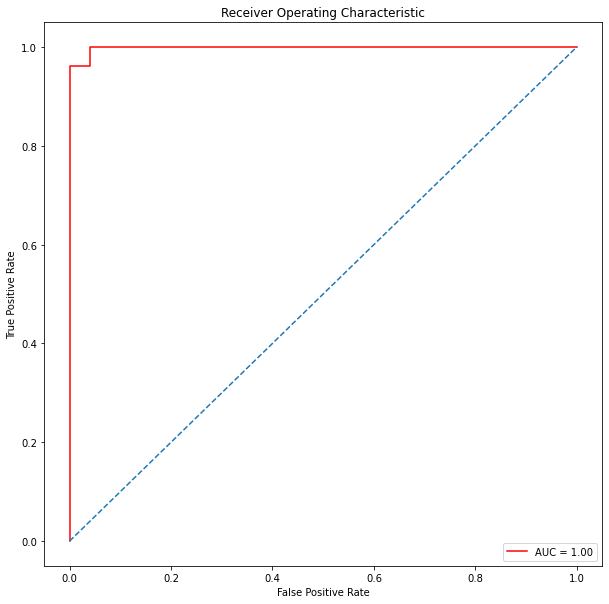

In [64]:
mlpc_tuned = MLPClassifier(activation = 'relu',
                           alpha = 0.1,
                           hidden_layer_sizes = (100,100),
                           solver = 'adam')
model(mlpc_tuned, train_x, test_x, train_y, test_y)

Korišćenje GreadSearchCV-a za pronalazak najboljih parametara za Decision Tree model:

In [65]:
dt_params = {'max_leaf_nodes': list(range(2, 100)), 
             'min_samples_split': [2, 3, 4, 5, 10], 
             'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
             'criterion' : ['gini', 'entropy']}

In [68]:
grid_search_cv = GridSearchCV(DecisionTreeClassifier(random_state=42), dt_params, verbose=1, cv=3)
grid_search_cv.fit(train_x, train_y)

Fitting 3 folds for each of 10780 candidates, totalling 32340 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...],
                         'min_samples_split': [2, 3, 4, 5, 10]},
             verbose=1)

In [70]:
print(grid_search_cv.best_score_)

0.9245726495726497


In [71]:
print(grid_search_cv.best_params_)

{'criterion': 'gini', 'max_depth': 2, 'max_leaf_nodes': 3, 'min_samples_split': 2}


Tačnost Decision Tree kasifikacije bez podešavanja modela je 0.9, dok bi sa podešavanjem modela bila 0.92.

#### Pregled

Svi modeli su se pokazali dobro sa tačnošću >= 0.9.

In [72]:
#Get question
def get_question(i):
    question = attribute_info.loc[i,'description']   
    print('Q{}: {}'.format(i,question))    

In [73]:
def feature_importances_graph(algorithm, train_x, train_y):
    alg = algorithm
    alg_model = alg.fit(train_x, train_y)
    pd.DataFrame(data = alg_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = train_x.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r", figsize = (15, 10))
    plt.xlabel("Feature Importances (%)")

#### Doprinos atrbuta:

##### Random Forest:

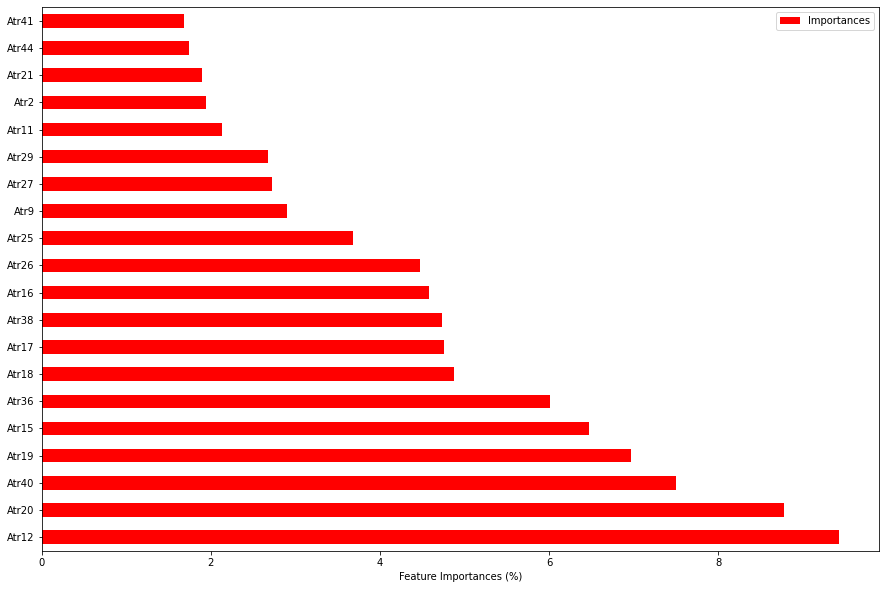

In [74]:
feature_importances_graph(RandomForestClassifier(), train_x, train_y)

In [77]:
questions_list = [12, 20, 40, 19, 15, 36, 18, 17, 38, 16, 26, 25, 9, 27, 29, 11, 2, 21, 44, 41]
for question_index in questions_list:
    get_question(question_index)

Q12: My spouse and I have similar values in terms of personal freedom.
Q20: My spouse and I have similar values in trust.
Q40: We're just starting a discussion before I know what's going on.
Q19: My spouse and I have similar ideas about how roles should be in marriage
Q15: Our dreams with my spouse are similar and harmonious.
Q36: I can be humiliating when we discussions.
Q18: My spouse and I have similar ideas about how marriage should be
Q17: We share the same views about being happy in our life with my spouse
Q38: I hate my spouse's way of open a subject.
Q16: We're compatible with my spouse about what love should be.
Q26: I know my spouse's basic anxieties.
Q25: I have knowledge of my spouse's inner world.
Q9: I enjoy traveling with my wife.
Q27: I know what my spouse's current sources of stress are.
Q29: I know my spouse very well.
Q11: I think that one day in the future, when I look back, I see that my spouse and I have been in harmony with each other.
Q2: I know we can ignore ou

##### Decision Tree:

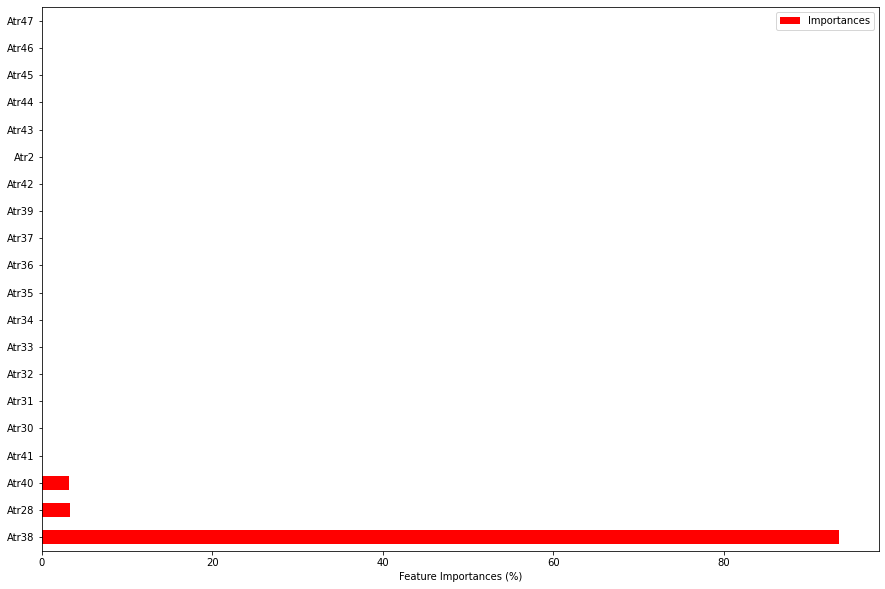

In [75]:
feature_importances_graph(DecisionTreeClassifier(max_depth = 12), train_x, train_y)

In [76]:
questions_list = [40, 28, 38]
for question_index in questions_list:
    get_question(question_index)

Q40: We're just starting a discussion before I know what's going on.
Q28: I know my spouse's hopes and wishes.
Q38: I hate my spouse's way of open a subject.


#### Zaključak

Ovaj skup podataka zasnovan je na istraživanju koje je obavio dr. Gottman i pitanjima koja u odgovaraju njegovim prediktorima razvoda.  

U videu ispod dr. Gottman priča o svom istraživanju.

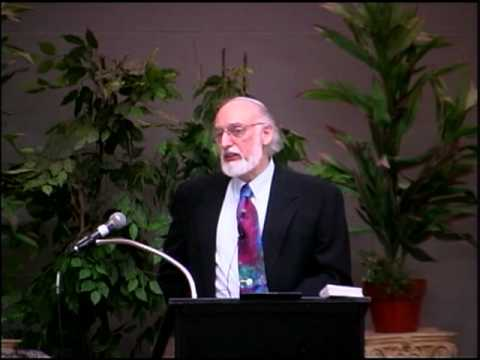

In [49]:
YouTubeVideo('q-isa2lp4Bg', width=800, height=450)